In [1198]:
# Chargement des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import os

# Algorithmes simples
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, Lasso, ElasticNet
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import *

# Algorithmes ensemblistes
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor, ExtraTreesRegressor

# Utiles
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.dummy import DummyRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor, make_column_transformer, ColumnTransformer
from sklearn import set_config
from statistics import stdev

# Normalisation
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder, RobustScaler, FunctionTransformer

# Scoring
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix

from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore')


In [1199]:
print(os.getcwd())

/Users/innakonar/Desktop


In [1200]:
data = pd.read_csv("../building_energy_cleaned.csv")

In [1201]:
df=data.copy()

In [1202]:
df.head()

,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge,DistanceToSeattle,GasScore,ElectricityScore,SteamUse(kBtu)Score,ParkingScore,BuildingScore,SurfacePerBuilding,SurfacePerFloor,TotalUseTypeNumber
0,Hotel,DOWNTOWN,1.0,12,88434,Hotel,60.0,7226362.5,249.98,96,0.497538,0.176638,0.546060,0.277302,0.000000,1.000000,88434.0,7369.500000,1
1,Hotel,DOWNTOWN,1.0,11,103566,Hotel,61.0,8387933.0,295.86,27,0.489059,0.613391,0.386609,0.000000,0.145453,0.854547,88502.0,8045.636364,3
2,Hotel,DOWNTOWN,1.0,41,956110,Hotel,43.0,72587024.0,2089.28,54,0.603129,0.020579,0.682307,0.297113,0.205748,0.794252,759392.0,18521.756098,1
3,Hotel,DOWNTOWN,1.0,10,61320,Hotel,56.0,6794584.0,286.43,97,0.586830,0.266567,0.407519,0.325913,0.000000,1.000000,61320.0,6132.000000,1
4,Hotel,DOWNTOWN,1.0,18,175580,Hotel,75.0,14172606.0,505.01,43,0.651898,0.621198,0.378802,0.000000,0.353115,0.646885,113580.0,6310.000000,3


In [1123]:
dim=df.shape
print(f"Rows:{dim[0]} Columns:{dim[1]}")

Rows:987 Columns:19


In [1124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PrimaryPropertyType     987 non-null    object 
 1   Neighborhood            987 non-null    object 
 2   NumberofBuildings       987 non-null    float64
 3   NumberofFloors          987 non-null    int64  
 4   PropertyGFATotal        987 non-null    int64  
 5   LargestPropertyUseType  987 non-null    object 
 6   ENERGYSTARScore         987 non-null    float64
 7   SiteEnergyUse(kBtu)     987 non-null    float64
 8   TotalGHGEmissions       987 non-null    float64
 9   BuildingAge             987 non-null    int64  
 10  DistanceToSeattle       987 non-null    float64
 11  GasScore                987 non-null    float64
 12  ElectricityScore        987 non-null    float64
 13  SteamUse(kBtu)Score     987 non-null    float64
 14  ParkingScore            987 non-null    fl

In [1203]:
ENERGYSTARS_core=df['ENERGYSTARScore']
df=df.drop('ENERGYSTARScore', axis=1)


In [1204]:
df.rename(columns={'SiteEnergyUse(kBtu)': 'SiteEnergyUse'}, inplace=True)

In [1205]:
selected_columns = ['Neighborhood', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'BuildingAge', 'DistanceToSeattle', 'ParkingScore', 'BuildingScore', 'SurfacePerBuilding',
                    'SurfacePerFloor', 'TotalUseTypeNumber','GasScore','ElectricityScore','SteamUse(kBtu)Score','PrimaryPropertyType','LargestPropertyUseType']
X = df[selected_columns]
y_ghg = df["TotalGHGEmissions"]

# Split the dataset into training and test sets for each target variable
X_train_ghg, X_test_ghg, y_train_ghg, y_test_ghg = train_test_split(X, y_ghg, test_size=0.2, random_state=42)
print(f"La taille de données d'entrainement : {X_train_ghg.shape[0]}")
print(f"La taille de données d'entrainement : {X_test_ghg.shape[0]}")

La taille de données d'entrainement : 789
La taille de données d'entrainement : 198


In [1206]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'BuildingAge', 'DistanceToSeattle', 'ParkingScore',
                                      'BuildingScore', 'SurfacePerBuilding', 'SurfacePerFloor', 'TotalUseTypeNumber','GasScore','ElectricityScore','SteamUse(kBtu)Score']),
        ('cat', categorical_transformer, ['Neighborhood','PrimaryPropertyType','LargestPropertyUseType'])
    ])

X_train_ghg_encoded = preprocessor.fit_transform(X_train_ghg)
X_test_ghg_encoded = preprocessor.transform(X_test_ghg)

In [1207]:
# Log transform the target variables
y_train_ghg_log = np.log1p(y_train_ghg)

In [1208]:
def score (modele, R2, RMSE, MAE, time):
    df_scores.loc[df_scores.shape[0]] = [modele, R2, RMSE, MAE, time]
    df_scores.sort_values(by='R2', ascending=False, inplace=True)
    df_scores.drop_duplicates(subset=['modele'], keep='last', inplace=True)
    df_scores.reset_index(drop=True, inplace=True)
    return df_scores

In [1209]:
scores = []
df_scores = pd.DataFrame(
    scores, columns=['modele', 'R2', 'RMSE', 'MAE', 'time'])

In [1138]:
def plot_pred(true_values, predicted_values, color, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(true_values, predicted_values, color=color, alpha=0.6)
    plt.plot([0, 800], [0, 800], color='black', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.xlim(0, 800)  
    plt.ylim(0, 800) 
    plt.show()

In [1210]:
#LinearRegression()
warnings.filterwarnings("ignore", category=ConvergenceWarning)

pipeline = Pipeline([
    ('regressor', LinearRegression())
])

param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__normalize': [True, False]
    
}

# GridSearchCV - TotalGHGEmissions
grid_cv_ghg = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', refit='neg_mean_absolute_error')
grid_cv_ghg.fit(X_train_ghg_encoded, y_train_ghg_log)

best_params_ghg = grid_cv_ghg.best_params_
best_score_ghg = grid_cv_ghg.best_score_


print("Best Parameters for TotalGHGEmissions:", best_params_ghg)
print("Best Score for TotalGHGEmissions:", best_score_ghg)


Best Parameters for TotalGHGEmissions: {'regressor__fit_intercept': True, 'regressor__normalize': False}
Best Score for TotalGHGEmissions: -0.5451387562346194


In [1211]:
y_pred_ghg = grid_cv_ghg.best_estimator_.predict(X_test_ghg_encoded)


In [1212]:
# Affichage des scores
rmse_LR = round(np.sqrt(mean_squared_error(y_test_ghg, np.expm1(y_pred_ghg))), 3)
mae_LR = round(mean_absolute_error(y_test_ghg, np.expm1(y_pred_ghg)), 3)
time_LR = round(grid_cv_ghg.cv_results_['mean_fit_time'].max(), 3)
r2_LR = r2_score(y_test_ghg, np.expm1(y_pred_ghg))
# Les meilleur parametres
print(grid_cv_ghg.best_params_)
# Ajoute à la liste des scores
score('Linear Regression', r2_LR, rmse_LR, mae_LR,  time_LR)

{'regressor__fit_intercept': True, 'regressor__normalize': False}


,modele,R2,RMSE,MAE,time
0,Linear Regression,-0.859636,1382.896,239.792,0.016


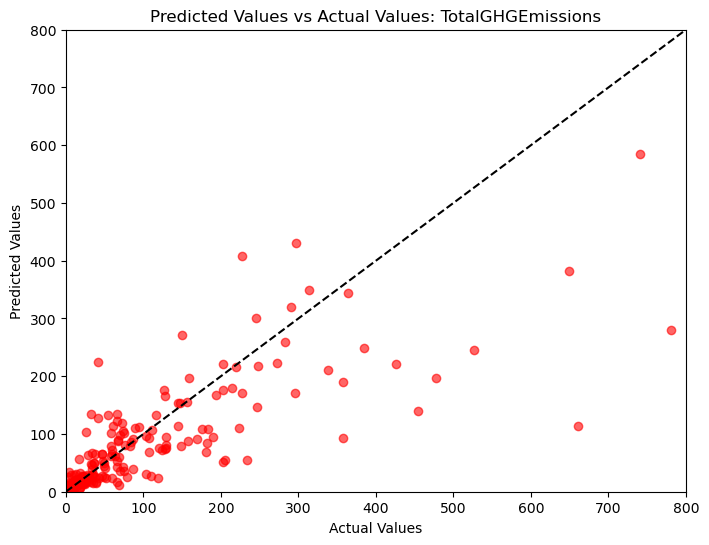

In [1213]:
plot_pred(y_test_ghg, np.expm1(y_pred_ghg), color="red", title="Predicted Values vs Actual Values: TotalGHGEmissions")


In [1214]:
#MLPRegressor
pipeline_mlp_ghg = Pipeline([
    ('regressor', MLPRegressor(hidden_layer_sizes=(100, 100, 100),max_iter=1000, solver='sgd', random_state=5))
])

param_grid_mlp_ghg = {
    'regressor__max_iter': [100, 500, 1000],
    'regressor__learning_rate_init': [0.001, 0.01]
}

grid_cv_mlp_ghg = GridSearchCV(pipeline_mlp_ghg, param_grid_mlp_ghg, cv=5, scoring='neg_mean_absolute_error', refit='neg_mean_absolute_error')
grid_cv_mlp_ghg.fit(X_train_ghg_encoded, y_train_ghg_log)

best_params_mlp_ghg = grid_cv_mlp_ghg.best_params_
best_score_mlp_ghg = grid_cv_mlp_ghg.best_score_
best_estimator_mlp_ghg = grid_cv_mlp_ghg.best_estimator_

print("Best Parameters for MLPRegressor - GHG Emissions:")
print(best_params_mlp_ghg)
print("Best Score for MLPRegressor - GHG Emissions:")
print(best_score_mlp_ghg)
print("Best Estimator for MLPRegressor - GHG Emissions:")
print(best_estimator_mlp_ghg)

Best Parameters for MLPRegressor - GHG Emissions:
{'regressor__learning_rate_init': 0.01, 'regressor__max_iter': 100}
Best Score for MLPRegressor - GHG Emissions:
-0.4258500618138953
Best Estimator for MLPRegressor - GHG Emissions:
Pipeline(steps=[('regressor',
                 MLPRegressor(hidden_layer_sizes=(100, 100, 100),
                              learning_rate_init=0.01, max_iter=100,
                              random_state=5, solver='sgd'))])


In [1215]:
y_pred_ghg = grid_cv_mlp_ghg.best_estimator_.predict(X_test_ghg_encoded)


In [1216]:
# Calculate MAE for GHG Emissions
mae_ghg = mean_absolute_error(y_test_ghg, np.expm1(y_pred_ghg))

# Calculate R^2 for GHG Emissions
r2_ghg = r2_score(y_test_ghg, np.expm1(y_pred_ghg))


print("GHG Emissions:")
print("MAE:", mae_ghg)
print("R^2:", r2_ghg)


GHG Emissions:
MAE: 117.07606336946762
R^2: 0.7476289237535312


In [1217]:
# Affichage des scores
r2_LR = r2_score(y_test_ghg, np.expm1(y_pred_ghg))
rmse_LR = round(np.sqrt(mean_squared_error(y_test_ghg, np.expm1(y_pred_ghg))), 3)
mae_LR = round(mean_absolute_error(y_test_ghg, np.expm1(y_pred_ghg)), 3)
time_LR = round(grid_cv_ghg.cv_results_['mean_fit_time'].max(), 3)

# Les meilleur parametres
print(best_params_mlp_ghg)

# Ajoute à la liste des scores
score('MLPRegressor', r2_LR, rmse_LR, mae_LR,  time_LR)

{'regressor__learning_rate_init': 0.01, 'regressor__max_iter': 100}


,modele,R2,RMSE,MAE,time
0,MLPRegressor,0.747629,509.443,117.076,0.016
1,Linear Regression,-0.859636,1382.896,239.792,0.016


Sur la base de ces scores, le modèle semble avoir un niveau de précision plus élevé dans la prédiction des émissions de GES par rapport à la consommation d'énergie du site, comme en témoignent le MAE inférieur et le R^2 supérieur pour les émissions de C2O. Ces résultats peuvent indiquer que le modèle MLPRegressor n'est pas optimal pour la tâche donnée de prédiction de la consommation d'énergie du sit

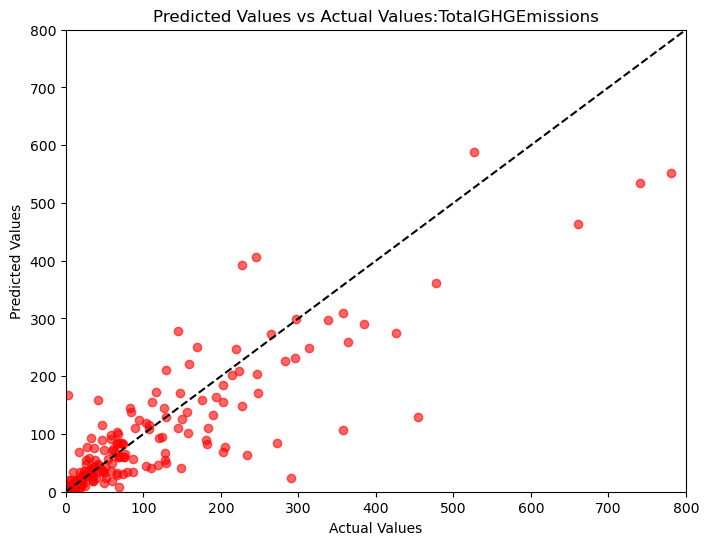

In [1218]:
plot_pred(y_test_ghg, np.expm1(y_pred_ghg), color="red", title="Predicted Values vs Actual Values:TotalGHGEmissions")

In [1219]:
from sklearn.inspection import permutation_importance

result = permutation_importance(grid_cv_mlp_ghg, X_train_ghg_encoded.toarray(), y_train_ghg_log, n_repeats=10, random_state=0)

importance = result.importances_mean

sorted_indices = np.argsort(importance)[::-1]

for i, idx in enumerate(sorted_indices):
    print(f"Feature {i+1}: Index {idx} - Importance: {importance[idx]}")


Feature 1: Index 10 - Importance: 0.4729590207063291
Feature 2: Index 2 - Importance: 0.2870441029679897
Feature 3: Index 7 - Importance: 0.22747700075141722
Feature 4: Index 11 - Importance: 0.16392536177421277
Feature 5: Index 8 - Importance: 0.11995166116146719
Feature 6: Index 1 - Importance: 0.102665741208335
Feature 7: Index 12 - Importance: 0.09197390981519182
Feature 8: Index 3 - Importance: 0.0913730099411557
Feature 9: Index 4 - Importance: 0.0847656319376416
Feature 10: Index 5 - Importance: 0.07664257611953784
Feature 11: Index 6 - Importance: 0.07578440230755978
Feature 12: Index 9 - Importance: 0.0723283408880924
Feature 13: Index 52 - Importance: 0.0410068340630483
Feature 14: Index 51 - Importance: 0.035716999899871434
Feature 15: Index 36 - Importance: 0.03187906639591097
Feature 16: Index 38 - Importance: 0.030422601275842627
Feature 17: Index 18 - Importance: 0.02830686002917241
Feature 18: Index 39 - Importance: 0.027013808601547857
Feature 19: Index 28 - Importance

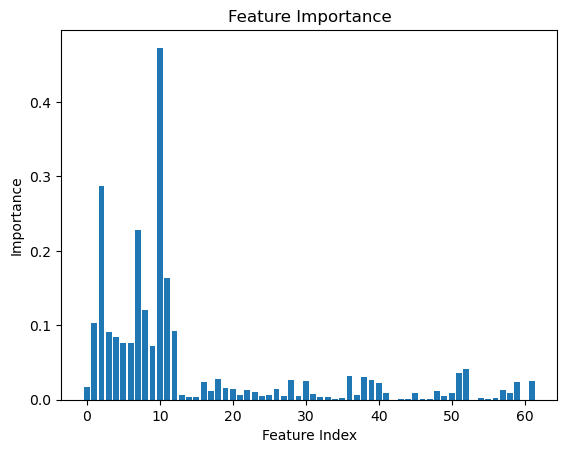

In [1220]:
plt.bar(range(len(importance)), importance)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()



In [1221]:
#Lasso
parametres_Lasso = {}

# On entraîne ce modèle sur les données d'entrainement
grid_Lasso = GridSearchCV(Lasso(), parametres_Lasso, cv=5)
modele_Lasso = grid_Lasso.fit(X_train_ghg_encoded, y_train_ghg_log)
y_pred_Lasso = grid_Lasso.predict(X_test_ghg_encoded)

In [1222]:
# Affichage des scores
r2 = r2_score(y_test_ghg, np.expm1(y_pred_Lasso))
rmse = round(np.sqrt(mean_squared_error(y_test_ghg, np.expm1(y_pred_Lasso))), 3)
mae = round(mean_absolute_error(y_test_ghg, np.expm1(y_pred_Lasso)), 3)
time = round(grid_Lasso.cv_results_['mean_fit_time'].max(), 3)

# Les meilleur parametres
print(grid_Lasso.best_params_)

# Ajoute à la liste des scores
score('Lasso', r2, rmse, mae,  time)



{}


,modele,R2,RMSE,MAE,time
0,MLPRegressor,0.747629,509.443,117.076,0.016
1,Lasso,-0.036027,1032.193,220.372,0.005
2,Linear Regression,-0.859636,1382.896,239.792,0.016


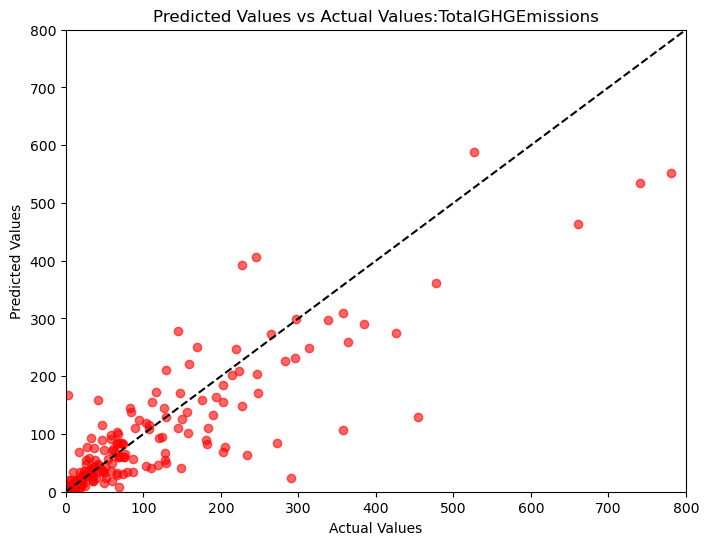

In [1223]:
plot_pred(y_test_ghg, np.expm1(y_pred_ghg), color="red", title="Predicted Values vs Actual Values:TotalGHGEmissions")

In [1224]:
#Ridge
parametres_Ridge = {}
grid_Ridge = GridSearchCV(Ridge(), parametres_Ridge, cv=5)
grid_Ridge.fit(X_train_ghg_encoded, y_train_ghg_log)
y_pred_Ridge = grid_Ridge.predict(X_test_ghg_encoded)



In [1225]:
# Affichage des scores
r2_Ridge = round(r2_score(y_test_ghg, np.expm1(y_pred_Ridge)), 3)
rmse_Ridge = round(np.sqrt(metrics.mean_squared_error(y_test_ghg, np.expm1(y_pred_Ridge))), 3)
mae_Ridge = round(metrics.median_absolute_error(y_test_ghg, np.expm1(y_pred_Ridge)), 3)
time_Ridge = round(grid_Ridge.cv_results_['mean_fit_time'].max(), 3)
            
print("Best Parameters for Ridge - GHG Emissions:")
print(grid_Ridge.best_params_)
                  
score('Ridge', r2_Ridge, rmse_Ridge, mae_Ridge, time_Ridge)
            


Best Parameters for Ridge - GHG Emissions:
{}


,modele,R2,RMSE,MAE,time
0,MLPRegressor,0.747629,509.443,117.076,0.016
1,Lasso,-0.036027,1032.193,220.372,0.005
2,Ridge,-0.390000,1195.701,20.697,0.007
3,Linear Regression,-0.859636,1382.896,239.792,0.016


In [1226]:
# ElasticNet - TotalGHGEmissions
pipeline_ghg = Pipeline([
    ('regressor', TransformedTargetRegressor(regressor=ElasticNet()))
])

param_grid_ghg = {
    'regressor__regressor__alpha': [0.1, 0.5, 1.0],
    'regressor__regressor__l1_ratio': [0.2, 0.5, 0.8]
}

grid_cv_ghg = GridSearchCV(pipeline_ghg, param_grid_ghg, cv=5, scoring='neg_mean_absolute_error', refit='neg_mean_absolute_error')
grid_cv_ghg.fit(X_train_ghg_encoded, y_train_ghg_log)

# Get the best parameters and scores for GHG emissions
best_params_ghg = grid_cv_ghg.best_params_
best_score_ghg = grid_cv_ghg.best_score_

In [1227]:
print("GHG Emissions - Best Parameters:", grid_cv_ghg.best_params_)
print("GHG Emissions - Best Score:", grid_cv_ghg.best_score_)

GHG Emissions - Best Parameters: {'regressor__regressor__alpha': 0.1, 'regressor__regressor__l1_ratio': 0.2}
GHG Emissions - Best Score: -0.626581003047326


In [1228]:
Y_pred_ghg = grid_cv_ghg.predict(X_test_ghg_encoded)

In [1229]:
# Calculate RMSE and R² scores on the test set for GHG Emissions
mse_ghg = mean_squared_error(y_test_ghg, np.expm1(Y_pred_ghg))
rmse_ghg = np.sqrt(mse_ghg)
r2_ghg = r2_score(y_test_ghg, np.expm1(Y_pred_ghg))

# Print the results
print("GHG Emissions:")
print("MSE:", mse_ghg)
print("RMSE:", rmse_ghg)
print("R^2:", r2_ghg)


GHG Emissions:
MSE: 761721.804328655
RMSE: 872.7667525339488
R^2: 0.25929447001303874


In [1230]:
r2_EN = r2_score(y_test_ghg, np.expm1(Y_pred_ghg))
rmse_EN = round(np.sqrt(mean_squared_error(y_test_ghg, np.expm1(Y_pred_ghg))), 3)
mae_EN = round(mean_absolute_error(y_test_ghg, np.expm1(Y_pred_ghg)), 3)
time_EN = round(grid_cv_ghg.cv_results_['mean_fit_time'].max(), 3)

# Les meilleur parametres
print(best_params_ghg)


score('ElasticNet', r2_EN, rmse_EN, mae_EN,  time_EN)

{'regressor__regressor__alpha': 0.1, 'regressor__regressor__l1_ratio': 0.2}


,modele,R2,RMSE,MAE,time
0,MLPRegressor,0.747629,509.443,117.076,0.016
1,ElasticNet,0.259294,872.767,200.053,0.008
2,Lasso,-0.036027,1032.193,220.372,0.005
3,Ridge,-0.390000,1195.701,20.697,0.007
4,Linear Regression,-0.859636,1382.896,239.792,0.016


In [1232]:
#RandomForestRegressor

clf_ghg = RandomForestRegressor()
parameters = {
    'n_estimators': range(100, 200, 300),
    'max_depth': range(1, 21, 5),
    'min_samples_leaf': range(2, 5, 10),
    'min_samples_split': range(2, 10, 2)
}

scoring = ('r2', 'neg_mean_absolute_error')

grid_ghg = GridSearchCV(clf_ghg, parameters, scoring=scoring, refit='neg_mean_absolute_error', cv=5)
grid_ghg.fit(X_train_ghg_encoded, y_train_ghg_log)

best_params = grid_ghg.best_params_
print(best_params)

{'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}


In [1233]:
best_model_ghg = grid_ghg.best_estimator_  
best_model_ghg.fit(X_train_ghg_encoded, y_train_ghg_log)

feature_importances = best_model_ghg.feature_importances_

Feature: 0, Score: 0.00192
Feature: 1, Score: 0.01018
Feature: 2, Score: 0.38896
Feature: 3, Score: 0.01825
Feature: 4, Score: 0.01357
Feature: 5, Score: 0.00139
Feature: 6, Score: 0.00136
Feature: 7, Score: 0.11238
Feature: 8, Score: 0.01633
Feature: 9, Score: 0.00512
Feature: 10, Score: 0.01518
Feature: 11, Score: 0.33032
Feature: 12, Score: 0.00104
Feature: 13, Score: 0.00161
Feature: 14, Score: 0.00012
Feature: 15, Score: 0.00069
Feature: 16, Score: 0.00049
Feature: 17, Score: 0.00039
Feature: 18, Score: 0.00271
Feature: 19, Score: 0.00064
Feature: 20, Score: 0.00032
Feature: 21, Score: 0.00043
Feature: 22, Score: 0.00180
Feature: 23, Score: 0.00065
Feature: 24, Score: 0.00037
Feature: 25, Score: 0.00009
Feature: 26, Score: 0.00056
Feature: 27, Score: 0.00640
Feature: 28, Score: 0.00080
Feature: 29, Score: 0.00024
Feature: 30, Score: 0.00100
Feature: 31, Score: 0.00022
Feature: 32, Score: 0.00047
Feature: 33, Score: 0.00105
Feature: 34, Score: 0.00001
Feature: 35, Score: 0.00001
Fe

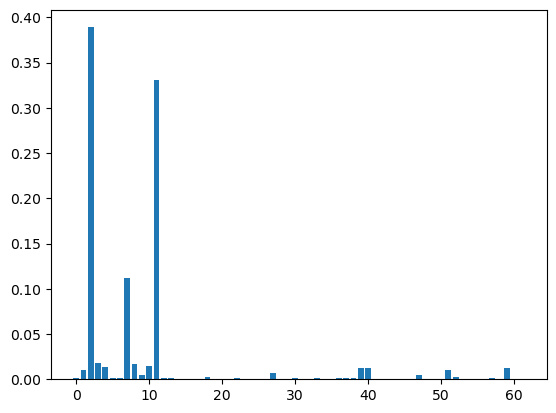

In [1234]:
for i,v in enumerate(feature_importances):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(feature_importances))], feature_importances)
plt.show()

In [1235]:
y_pred_ghg = best_model_ghg.predict(X_test_ghg_encoded)

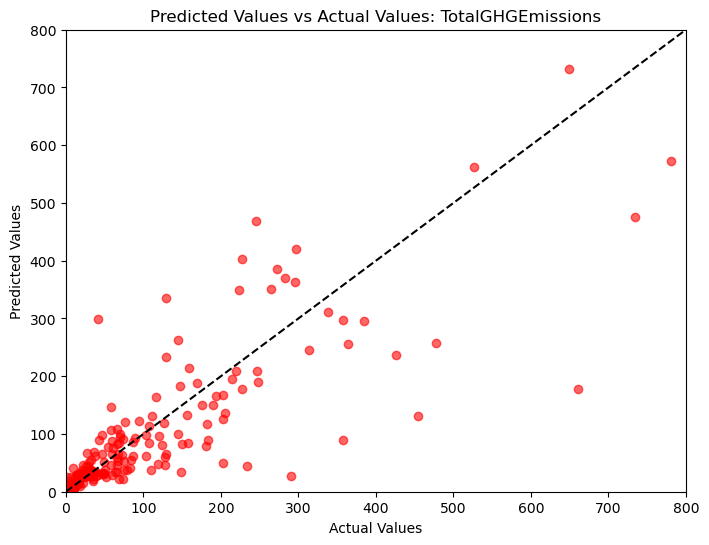

In [1236]:
plot_pred(y_test_ghg, np.expm1(y_pred_ghg), color="red", title="Predicted Values vs Actual Values: TotalGHGEmissions")


In [1237]:
r2_RFR = r2_score(y_test_ghg, np.expm1(y_pred_ghg))
rmse_RFR = round(np.sqrt(mean_squared_error(y_test_ghg, np.expm1(y_pred_ghg))), 3)
mae_RFR = round(mean_absolute_error(y_test_ghg, np.expm1(y_pred_ghg)), 3)
time_RFR = round(grid_cv_ghg.cv_results_['mean_fit_time'].max(), 3)

# Les meilleur parametres
print(best_params_ghg)


score('RandomForestRegressor', r2_RFR, rmse_RFR, mae_RFR,  time_RFR)

{'regressor__regressor__alpha': 0.1, 'regressor__regressor__l1_ratio': 0.2}


,modele,R2,RMSE,MAE,time
0,MLPRegressor,0.747629,509.443,117.076,0.016
1,RandomForestRegressor,0.566824,667.433,127.445,0.008
2,ElasticNet,0.259294,872.767,200.053,0.008
3,Lasso,-0.036027,1032.193,220.372,0.005
4,Ridge,-0.390000,1195.701,20.697,0.007
5,Linear Regression,-0.859636,1382.896,239.792,0.016


In [1238]:
# SVR
parameters_SVR = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
clf_ghg = SVR(kernel="rbf",gamma="auto",C=100)
grid_SVR = GridSearchCV(clf_ghg, parameters_SVR, cv=5)
grid_SVR.fit(X_train_ghg_encoded, y_train_ghg_log)
y_pred_SVR = grid_SVR.predict(X_test_ghg_encoded)

In [1239]:
r2_SVR = round(r2_score(y_test_ghg, np.expm1(y_pred_SVR)), 3)
rmse_SVR = round(np.sqrt(metrics.mean_squared_error(y_test_ghg, np.expm1(y_pred_SVR))), 3)
mae_SVR = round(mean_absolute_error(y_test_ghg, np.expm1(y_pred_SVR)), 3)
time_SVR = round(grid_SVR.cv_results_['mean_fit_time'].max(), 3)

print(grid_SVR.best_params_)

score('SVR', r2_SVR, rmse_SVR, mae_SVR, time_SVR)

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


,modele,R2,RMSE,MAE,time
0,MLPRegressor,0.747629,509.443,117.076,0.016
1,RandomForestRegressor,0.566824,667.433,127.445,0.008
2,SVR,0.394000,789.676,138.203,0.374
3,ElasticNet,0.259294,872.767,200.053,0.008
4,Lasso,-0.036027,1032.193,220.372,0.005
5,Ridge,-0.390000,1195.701,20.697,0.007
6,Linear Regression,-0.859636,1382.896,239.792,0.016


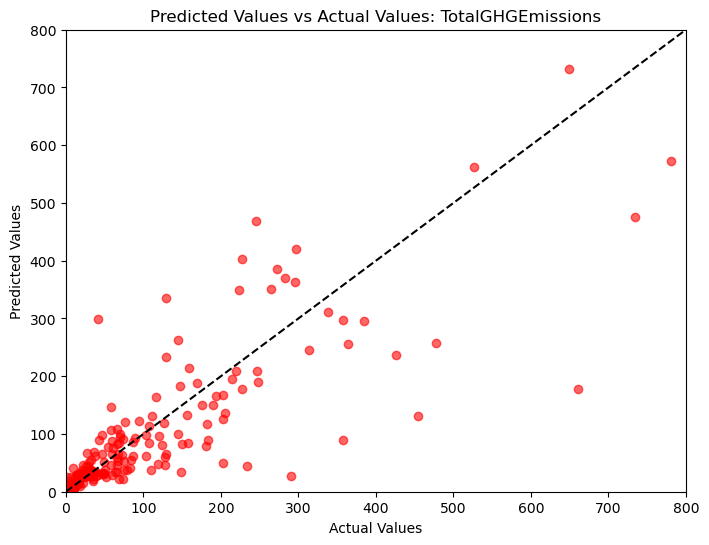

In [1240]:
plot_pred(y_test_ghg, np.expm1(y_pred_ghg), color="red", title="Predicted Values vs Actual Values: TotalGHGEmissions")


In [1243]:
#k-Nearest Neighbours
parametres_kNN = {
    'n_neighbors': np.arange(1, 30),
    'metric': ['euclidean', 'manhattan', 'minkowski']
    
}

grid_KNN = GridSearchCV(KNeighborsRegressor(), parametres_kNN, cv=5)
grid_KNN.fit(X_train_ghg_encoded, y_train_ghg_log)
y_pred_KNN = grid_KNN.predict(X_test_ghg_encoded)

In [1244]:
r2_KNN = round(r2_score(y_test_ghg, np.expm1(y_pred_KNN)), 3)
rmse_KNN = round(np.sqrt(metrics.mean_squared_error(y_test_ghg, np.expm1(y_pred_KNN))), 3)
mae_KNN = round(mean_absolute_error(y_test_ghg, np.expm1(y_pred_KNN)), 3)
time_KNN = round(grid_KNN.cv_results_['mean_fit_time'].max(), 3)

print(grid_KNN.best_params_)
score('K Neighbors Regressor', r2_KNN, rmse_KNN, mae_KNN, time_KNN)

{'metric': 'manhattan', 'n_neighbors': 5}


,modele,R2,RMSE,MAE,time
0,MLPRegressor,0.747629,509.443,117.076,0.016
1,RandomForestRegressor,0.566824,667.433,127.445,0.008
2,SVR,0.394000,789.676,138.203,0.374
3,K Neighbors Regressor,0.387000,794.259,161.458,0.001
4,ElasticNet,0.259294,872.767,200.053,0.008
5,Lasso,-0.036027,1032.193,220.372,0.005
6,Ridge,-0.390000,1195.701,20.697,0.007
7,Linear Regression,-0.859636,1382.896,239.792,0.016


In [1245]:
#Gradient Boosting Regressor
parameters_XG = {
    "max_depth": [1, 3, 5, 7, 9, 11, 12],
    "max_features": ["auto", "log2", None],
}

grid_XG = GridSearchCV(GradientBoostingRegressor(), parameters_XG, cv=5)
grid_XG.fit(X_train_ghg_encoded, y_train_ghg_log)
y_pred_XG = grid_XG.predict(X_test_ghg_encoded)

In [1246]:
r2_XG = round(r2_score(y_test_ghg, np.expm1(y_pred_XG)), 3)
rmse_XG = round(np.sqrt(metrics.mean_squared_error(y_test_ghg, np.expm1(y_pred_XG))), 3)
mae_XG = round(mean_absolute_error(y_test_ghg, np.expm1(y_pred_XG)), 3)
time_XG = round(grid_XG.cv_results_['mean_fit_time'].max(), 3)

print(grid_XG.best_params_)
score('Gradient Boosting Regressor', r2_XG, rmse_XG, mae_XG, time_XG)

{'max_depth': 3, 'max_features': None}


,modele,R2,RMSE,MAE,time
0,Gradient Boosting Regressor,0.767000,489.567,106.340,0.860
1,MLPRegressor,0.747629,509.443,117.076,0.016
2,RandomForestRegressor,0.566824,667.433,127.445,0.008
3,SVR,0.394000,789.676,138.203,0.374
4,K Neighbors Regressor,0.387000,794.259,161.458,0.001
5,ElasticNet,0.259294,872.767,200.053,0.008
6,Lasso,-0.036027,1032.193,220.372,0.005
7,Ridge,-0.390000,1195.701,20.697,0.007
8,Linear Regression,-0.859636,1382.896,239.792,0.016


In [1247]:
#Decision Tree Regressor
parameters_DT = {
    "max_depth": [1, 3, 5, 7, 9, 11, 12],
    "max_features": ["auto", "log2", None],
}

grid_DT = GridSearchCV(DecisionTreeRegressor(random_state = 42), parameters_DT, cv=5)
grid_DT.fit(X_train_ghg_encoded, y_train_ghg_log)
y_pred_DT = grid_DT.predict(X_test_ghg_encoded)

In [1251]:
r2_DT = round(r2_score(y_test_ghg, np.expm1(y_pred_DT)), 3)
rmse_DT = round(np.sqrt(metrics.mean_squared_error(y_test_ghg, np.expm1(y_pred_DT))), 3)
mae_DT = round(mean_absolute_error(y_test_ghg, np.expm1(y_pred_DT)), 3)
time_DT = round(grid_DT.cv_results_['mean_fit_time'].max(), 3)

print(grid_DT.best_params_)
score('Decision Tree Regressor', r2_DT, rmse_DT, mae_DT, time_DT)

{'max_depth': 7, 'max_features': 'auto'}


,modele,R2,RMSE,MAE,time
0,Decision Tree Regressor,0.813000,438.935,126.034,0.009
1,Gradient Boosting Regressor,0.767000,489.567,106.340,0.860
2,MLPRegressor,0.747629,509.443,117.076,0.016
3,RandomForestRegressor,0.566824,667.433,127.445,0.008
4,SVR,0.394000,789.676,138.203,0.374
5,K Neighbors Regressor,0.387000,794.259,161.458,0.001
6,ElasticNet,0.259294,872.767,200.053,0.008
7,Lasso,-0.036027,1032.193,220.372,0.005
8,Ridge,-0.390000,1195.701,20.697,0.007
9,Linear Regression,-0.859636,1382.896,239.792,0.016


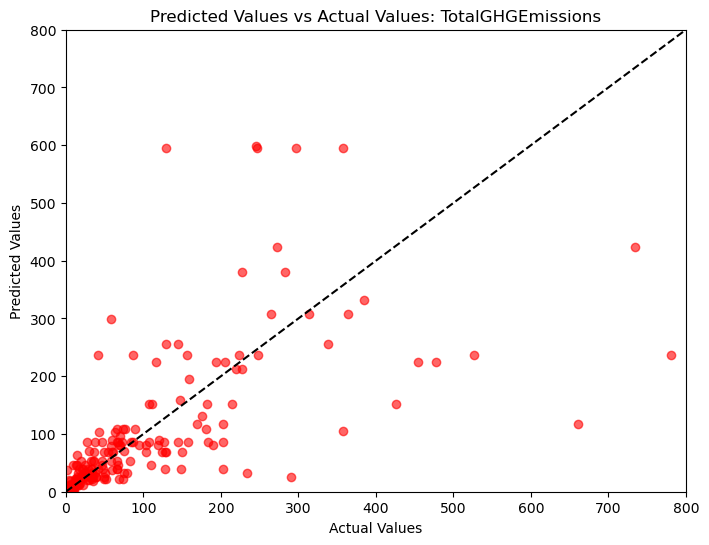

In [1252]:
plot_pred(y_test_ghg, np.expm1(y_pred_DT), color="red", title="Predicted Values vs Actual Values: TotalGHGEmissions")


In [1173]:
#BaggingRegressor
parameters_BR = {
    "n_estimators": [10, 50, 100],
    "max_samples": [0.5, 0.8, 1.0],
    "max_features": [0.5, 0.8, 1.0]
}

grid_BR = GridSearchCV(BaggingRegressor(random_state=42), parameters_BR, cv=5)
grid_BR.fit(X_train_ghg_encoded, y_train_ghg_log)
y_pred_BR = grid_BR.predict(X_test_ghg_encoded)

r2_BR = round(r2_score(y_test_ghg, np.expm1(y_pred_BR)), 3)
rmse_BR = round(np.sqrt(metrics.mean_squared_error(y_test_ghg, np.expm1(y_pred_BR))), 3)
mae_BR = round(mean_absolute_error(y_test_ghg, np.expm1(y_pred_BR)), 3)
time_BR = round(grid_BR.cv_results_['mean_fit_time'].max(), 3)

print(grid_BR.best_params_)
score('Bagging Regressor', r2_BR, rmse_BR, mae_BR, time_BR)

{'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 100}


,modele,R2,RMSE,MAE,time
0,Decision Tree Regressor,0.813000,438.935,126.034,0.008
1,Gradient Boosting Regressor,0.783000,472.495,104.189,0.836
2,MLPRegressor,0.747629,509.443,117.076,0.014
3,Bagging Regressor,0.542000,685.985,129.232,0.794
4,RandomForestRegressor,0.511028,709.117,130.586,0.008
5,K Neighbors Regressor,0.387000,794.259,161.458,0.001
6,SVR,0.351000,816.826,141.849,0.088
7,ElasticNet,0.259294,872.767,200.053,0.008
8,Lasso,-0.036027,1032.193,220.372,0.002
9,Ridge,-0.390000,1195.701,20.697,0.007


In [1253]:
#Extra Trees Regressor
parameters_ET = {
    "max_depth": [1, 3, 5, 7, 9, 11, 12],
    "max_features": ["auto", "log2", None],
}

grid_ET = GridSearchCV(ExtraTreesRegressor(random_state=42), parameters_ET, cv=5)
grid_ET.fit(X_train_ghg_encoded, y_train_ghg_log)
y_pred_ET = grid_ET.predict(X_test_ghg_encoded)


In [1254]:
r2_ET = round(r2_score(y_test_ghg, np.expm1(y_pred_ET)), 3)
rmse_ET = round(np.sqrt(metrics.mean_squared_error(y_test_ghg, np.expm1(y_pred_ET))), 3)
mae_ET = round(mean_absolute_error(y_test_ghg, np.expm1(y_pred_ET)), 3)
time_ET = round(grid_ET.cv_results_['mean_fit_time'].max(), 3)

print(grid_ET.best_params_)
score('Extra Trees Regressor', r2_ET, rmse_ET, mae_ET, time_ET)


{'max_depth': 11, 'max_features': 'auto'}


,modele,R2,RMSE,MAE,time
0,Decision Tree Regressor,0.813000,438.935,126.034,0.009
1,Gradient Boosting Regressor,0.767000,489.567,106.340,0.860
2,MLPRegressor,0.747629,509.443,117.076,0.016
3,Extra Trees Regressor,0.746000,511.075,113.606,0.548
4,RandomForestRegressor,0.566824,667.433,127.445,0.008
5,SVR,0.394000,789.676,138.203,0.374
6,K Neighbors Regressor,0.387000,794.259,161.458,0.001
7,ElasticNet,0.259294,872.767,200.053,0.008
8,Lasso,-0.036027,1032.193,220.372,0.005
9,Ridge,-0.390000,1195.701,20.697,0.007


In [1255]:
#AdaBoostRegressor

parameters_AB = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1.0]
}

grid_AB = GridSearchCV(AdaBoostRegressor(random_state=42), parameters_AB, cv=5)
grid_AB.fit(X_train_ghg_encoded, y_train_ghg_log)
y_pred_AB = grid_AB.predict(X_test_ghg_encoded)


In [1256]:
r2_AB = round(r2_score(y_test_ghg, np.expm1(y_pred_AB)), 3)
rmse_AB = round(np.sqrt(metrics.mean_squared_error(y_test_ghg, np.expm1(y_pred_AB))), 3)
mae_AB = round(mean_absolute_error(y_test_ghg, np.expm1(y_pred_AB)), 3)
time_AB = round(grid_AB.cv_results_['mean_fit_time'].max(), 3)

print(grid_AB.best_params_)
score('AdaBoost Regressor', r2_AB, rmse_AB, mae_AB, time_AB)

{'learning_rate': 1.0, 'n_estimators': 200}


,modele,R2,RMSE,MAE,time
0,Decision Tree Regressor,0.813000,438.935,126.034,0.009
1,Gradient Boosting Regressor,0.767000,489.567,106.340,0.860
2,MLPRegressor,0.747629,509.443,117.076,0.016
3,Extra Trees Regressor,0.746000,511.075,113.606,0.548
4,RandomForestRegressor,0.566824,667.433,127.445,0.008
5,AdaBoost Regressor,0.565000,668.734,143.153,0.494
6,SVR,0.394000,789.676,138.203,0.374
7,K Neighbors Regressor,0.387000,794.259,161.458,0.001
8,ElasticNet,0.259294,872.767,200.053,0.008
9,Lasso,-0.036027,1032.193,220.372,0.005


In [1257]:
#Evaluation des modèles avec Energy Star Score

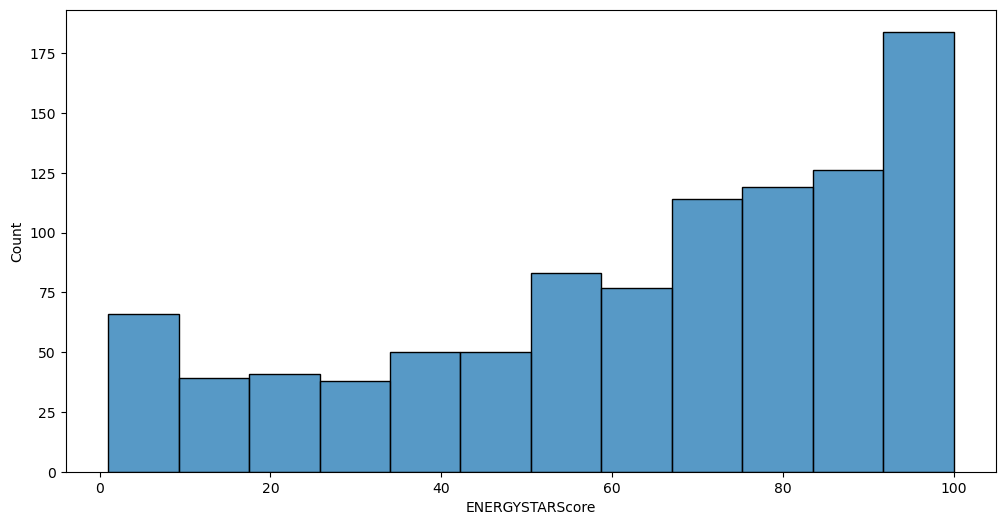

In [1258]:
plt.figure(figsize=(12,6))
sns.histplot(data=ENERGYSTARS_core);

In [1259]:
df["ENERGYSTARScore"] = ENERGYSTARS_core

In [1260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PrimaryPropertyType     987 non-null    object 
 1   Neighborhood            987 non-null    object 
 2   NumberofBuildings       987 non-null    float64
 3   NumberofFloors          987 non-null    int64  
 4   PropertyGFATotal        987 non-null    int64  
 5   LargestPropertyUseType  987 non-null    object 
 6   SiteEnergyUse           987 non-null    float64
 7   TotalGHGEmissions       987 non-null    float64
 8   BuildingAge             987 non-null    int64  
 9   DistanceToSeattle       987 non-null    float64
 10  GasScore                987 non-null    float64
 11  ElectricityScore        987 non-null    float64
 12  SteamUse(kBtu)Score     987 non-null    float64
 13  ParkingScore            987 non-null    float64
 14  BuildingScore           987 non-null    fl

In [1261]:
fig = px.scatter(df, x='ENERGYSTARScore', y='TotalGHGEmissions', trendline='ols')
pyo.iplot(fig, 'scatter-plot-energystar-ghg')

In [1262]:
selected_columns = ['Neighborhood', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'BuildingAge', 'DistanceToSeattle', 'ParkingScore', 'BuildingScore', 'SurfacePerBuilding',
                    'SurfacePerFloor', 'TotalUseTypeNumber','GasScore','ElectricityScore','SteamUse(kBtu)Score','PrimaryPropertyType','LargestPropertyUseType','ENERGYSTARScore']
X = df[selected_columns]
y_ghg = df["TotalGHGEmissions"]

# Split the dataset into training and test sets for each target variable
X_train_ghg, X_test_ghg, y_train_ghg, y_test_ghg = train_test_split(X, y_ghg, test_size=0.2, random_state=42)
print(f"La taille de données d'entrainement : {X_train_ghg.shape[0]}")
print(f"La taille de données d'entrainement : {X_test_ghg.shape[0]}")

La taille de données d'entrainement : 789
La taille de données d'entrainement : 198


In [1263]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'BuildingAge', 'DistanceToSeattle', 'ParkingScore',
                                      'BuildingScore', 'SurfacePerBuilding', 'SurfacePerFloor', 'TotalUseTypeNumber','GasScore','ElectricityScore','SteamUse(kBtu)Score','ENERGYSTARScore']),
        ('cat', categorical_transformer, ['Neighborhood','PrimaryPropertyType','LargestPropertyUseType'])
    ])

X_train_ghg_encoded = preprocessor.fit_transform(X_train_ghg)
X_test_ghg_encoded = preprocessor.transform(X_test_ghg)

In [1264]:
y_train_ghg_log = np.log1p(y_train_ghg)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00740
Feature: 2, Score: 0.45923
Feature: 3, Score: 0.01463
Feature: 4, Score: 0.00549
Feature: 5, Score: 0.00307
Feature: 6, Score: 0.00209
Feature: 7, Score: 0.01523
Feature: 8, Score: 0.01069
Feature: 9, Score: 0.00136
Feature: 10, Score: 0.00521
Feature: 11, Score: 0.32209
Feature: 12, Score: 0.00014
Feature: 13, Score: 0.06872
Feature: 14, Score: 0.00288
Feature: 15, Score: 0.00031
Feature: 16, Score: 0.00130
Feature: 17, Score: 0.00043
Feature: 18, Score: 0.00039
Feature: 19, Score: 0.00125
Feature: 20, Score: 0.00026
Feature: 21, Score: 0.00003
Feature: 22, Score: 0.00252
Feature: 23, Score: 0.00004
Feature: 24, Score: 0.00189
Feature: 25, Score: 0.00024
Feature: 26, Score: 0.00023
Feature: 27, Score: 0.00066
Feature: 28, Score: 0.01186
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00066
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00006
Feature: 33, Score: 0.00005
Feature: 34, Score: 0.00011
Feature: 35, Score: 0.00000
Fe

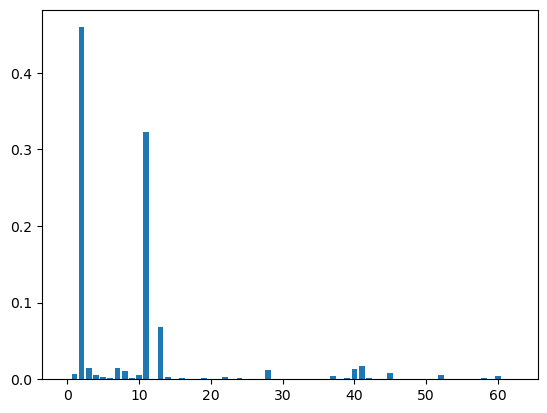

In [1265]:
#Decision Tree Regressor
parameters_DT_ES = {
    "max_depth": [1, 3, 5, 7, 9, 11, 12],
    "max_features": ["auto", "log2", None],
}

grid_DT_ES = GridSearchCV(DecisionTreeRegressor(random_state = 42), parameters_DT, cv=5)
grid_DT_ES.fit(X_train_ghg_encoded, y_train_ghg_log)
y_pred_DT_ES = grid_DT_ES.predict(X_test_ghg_encoded)

best_model_DT_ES = grid_DT_ES.best_estimator_

feature_importances_DT_ES = best_model_DT_ES.feature_importances_


for i, v in enumerate(feature_importances_DT_ES):
    print('Feature: %0d, Score: %.5f' % (i, v))

plt.bar([x for x in range(len(feature_importances_DT_ES))], feature_importances_DT_ES)
plt.show()



encoded_feature_names = one_hot_encoder.get_feature_names_out(input_features=categorical_features)



encoded_feature_names = encoded_df.columns.tolist()


In [1266]:
r2_DT_ES = round(r2_score(y_test_ghg, np.expm1(y_pred_DT_ES)), 3)
rmse_DT_ES = round(np.sqrt(metrics.mean_squared_error(y_test_ghg, np.expm1(y_pred_DT_ES))), 3)
mae_DT_ES = round(mean_absolute_error(y_test_ghg, np.expm1(y_pred_DT_ES)), 3)
time_DT_ES = round(grid_DT_ES.cv_results_['mean_fit_time'].max(), 3)

print(grid_DT_ES.best_params_)
score('Decision Tree Regressor ENERGYSTARScore', r2_DT_ES, rmse_DT_ES, mae_DT_ES, time_DT_ES)

{'max_depth': 12, 'max_features': 'auto'}


,modele,R2,RMSE,MAE,time
0,Decision Tree Regressor ENERGYSTARScore,0.853000,389.043,102.490,0.009
1,Decision Tree Regressor,0.813000,438.935,126.034,0.009
2,Gradient Boosting Regressor,0.767000,489.567,106.340,0.860
3,MLPRegressor,0.747629,509.443,117.076,0.016
4,Extra Trees Regressor,0.746000,511.075,113.606,0.548
5,RandomForestRegressor,0.566824,667.433,127.445,0.008
6,AdaBoost Regressor,0.565000,668.734,143.153,0.494
7,SVR,0.394000,789.676,138.203,0.374
8,K Neighbors Regressor,0.387000,794.259,161.458,0.001
9,ElasticNet,0.259294,872.767,200.053,0.008


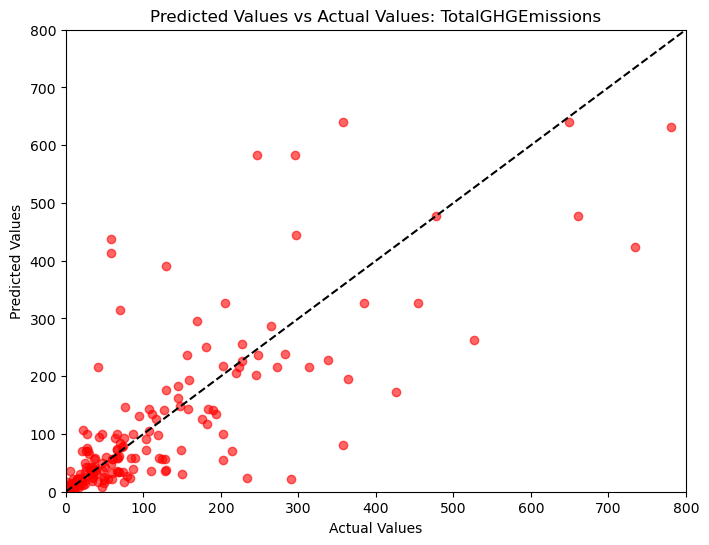

In [1267]:
plot_pred(y_test_ghg, np.expm1(y_pred_DT_ES), color="red", title="Predicted Values vs Actual Values: TotalGHGEmissions")


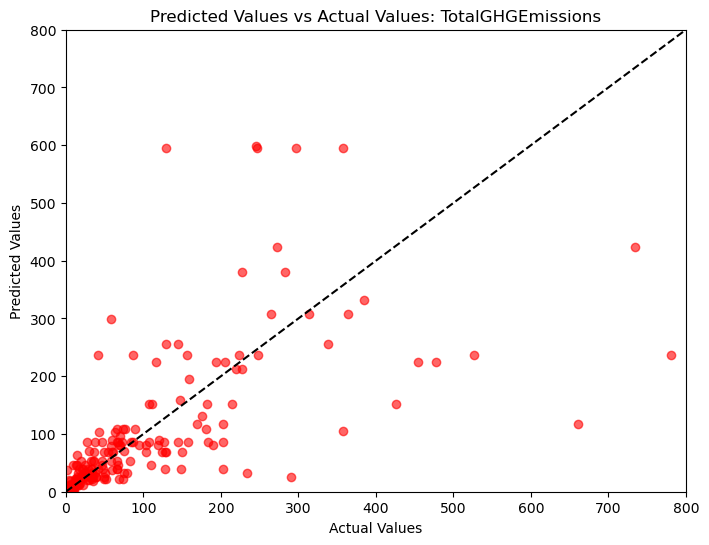

In [1268]:
plot_pred(y_test_ghg, np.expm1(y_pred_DT), color="red", title="Predicted Values vs Actual Values: TotalGHGEmissions")


En utilisant la cote ENERGYSTAR, nous avons fait de bonnes prévisions pour  la réduction des émissions de C2O dans les bâtiments non résidentiels de la ville de Seattle.

Decision Tree Regressor est l'algorithme qui nous donne les meilleurs résultats, et le temps calculé est beaucoup plus petit que les algorithmes Gradient Boosting, RandomForest, MLPRegressor et ExtraTrees.

La modèle que nous avons créé dans ce notebook peut être utile si la classification ENERGYSTAR est utilisée à l'avenir.